In [18]:
import os
import sys
from google.colab import drive
drive.mount('/content/gdrive/')
my_path = '/content/notebooks'
# Colab Notebooks 안에 my_env 폴더에 패키지 저장
sys.path.insert(0, my_path)

os.chdir('/content/gdrive/My Drive/Colab Notebooks/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
!pip install --target=$my_path researchpy

In [ ]:
!pip install --target=$my_path pingouin

In [ ]:
!pip install --target=$my_path scikit_posthocs

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import researchpy as rp
import scipy.stats as stats
import pingouin as pg
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import scikit_posthocs as sp

In [20]:
iris = pd.read_excel('./iris.xlsx', header = 0, sheet_name= 0)

## 분산분석 (ANOVA)

In [ ]:
# 언제
# 독립적인 k개 집단의 양적 자료에 차이가 있는 지를 분석하는 방법

In [ ]:
# 참고
# sepal_length : 꽃받침의 길이
# sepal_width : 꽃받침의 너비
# petal_length : 꽃잎의 길이
# petal_width : 꽃잎의 너비
# 단위 : cm
# species : 꽃의 종류

In [ ]:
# 귀무가설 : iris 품종(setosa, versicolor, virginica)에 따른 꽃잎의 길이(petal_length)차이는 없다
# 대립가설 : 차이가 있다.

### 1. 분산분석

In [ ]:
# 3집단의 양적 자료가 모두 정규성 가정을 만족할 때 사용

In [ ]:
# EDA

In [ ]:
# 꽃잎의 길이 (petal_length)
rp.summary_cont(iris.petal_length)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,petal_length,150.0,3.758,1.7653,0.1441,3.4732,4.0428


In [ ]:
# 세 품종의 꽃잎의 길이 : petal_length
rp.summary_cont(iris.petal_length.groupby(iris.species))

,N,Mean,SD,SE,95% Conf.,Interval
species,,,,,,
setosa,50,1.462,0.1737,0.0246,1.4126,1.5114
versicolor,50,4.260,0.4699,0.0665,4.1265,4.3935
virginica,50,5.552,0.5519,0.0780,5.3952,5.7088


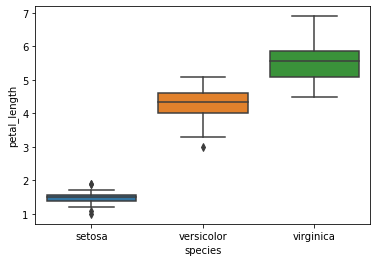

In [ ]:
# 품종별 꽃잎의 길이에 대한 상자 그림
sns.boxplot(x = 'species',
            y = 'petal_length',
            data = iris)
plt.show()

In [ ]:
# 등분산 검정
# 귀무가설 : 등분산이다
# 대립가설 : 이분산이다

In [ ]:
# stats.levene()
# stats.bartlett()

In [ ]:
stats.levene(iris.loc[iris.species == 'setosa','petal_length'],
             iris.loc[iris.species == 'versicolor', 'petal_length'],
             iris.loc[iris.species == 'virginica', 'petal_length'])

LeveneResult(statistic=19.480338801923573, pvalue=3.1287566394085344e-08)

In [ ]:
# 결론
# F = 검정통계량 = 19.480
# 유의확률 = p-value = 0.000

# 유의확률 0.000이므로 유의수준 0.05에서 이분산이다.

In [ ]:
# 따라서 이분산이 가정된 분산분석!
# pingouin -> pg
# pg.welch_anova(dv = '양적자료', between = '집단 = 질적 자료', data = )

# 참고
# dv = dependent variable = 종속변수 = label / 양적자료
# between = independent variable = 독립변수 = feature / 질적자료

pg.welch_anova(dv = 'petal_length', between = 'species', data = iris)

,Source,ddof1,ddof2,F,p-unc,np2
0,species,2,78.072955,1828.091945,2.693327e-66,0.941372


In [ ]:
# ddof1 : k-1 (자유도)  = 2 
# ddof2 : n-k (자유도)  = 78.073
# F     : 검정통계량     = 1828.092
# p-unc : p-value      = 0.000

In [ ]:
# 결론
# 유의확률이 0.000 이므로 유의수준 0.05에서 품종에 따른 꽃잎의 길이에 통계적으로 유의한 차이가 있는 것으로 나타났다.

In [ ]:
# 등분산이 가정된 분산분석
# stats. f_oneway(집단1의 양적자료, 집단2의 양적자료, 집단 3의 양적자료)

# 참고
# f : 검정통계량 F
# oneway : 일원배치 -> 하나의 질적자료

stats.f_oneway(iris.loc[iris.species == 'setosa', 'petal_length'],
               iris.loc[iris.species == 'versicolor', 'petal_length'],
               iris.loc[iris.species == 'virginica', 'petal_length'])

F_onewayResult(statistic=1180.161182252981, pvalue=2.8567766109615584e-91)

In [ ]:
# 결과
# F = 1180.161
# 유의확률 = p-value = 0.000

In [ ]:
# 결론 : 유의확률 0.000이므로 유의수준 0.005에서 품종에 따른 꽃잎의 길이에 통계적으로 유의미한 차이가 있는 것으로 나타났다.

In [ ]:
# 회귀분석을 이용한 분산분석
# result = ols('양적자료 ~ 질적자료', data = ).fit()
# result.summary()
# sm.stats.anova_lm(result, type = 2)

In [ ]:
iris_result = ols('petal_length ~ species', data = iris).fit()
iris_result.summary()
sm.stats.anova_lm(iris_result, type =2)

,df,sum_sq,mean_sq,F,PR(>F)
species,2.0,437.1028,218.551400,1180.161182,2.856777e-91
Residual,147.0,27.2226,0.185188,NaN,NaN


In [ ]:
# 해석
# k-1 = 2.0 (자유도)
# k-n = 147 (자유도)
# SSB = 437.103
# SSE = 27.223
# MSB = 218.551
# MSE = 0.185
# F = 1180.161
# p-value = 0.000 

### 2. 크루스칼 - 왈리스 순위합 검정 (Kruskal-Wallis rank sum test)

In [ ]:
# k 집단 중 하나라도 정규성 가정이 깨질 때 사용

In [ ]:
# stats.kruskal(집단 1의 양적자료, 집단 2의 양적자료, 집단 3의 양적자료)
stats.kruskal(iris.loc[iris.species == 'setosa', 'petal_length'],
              iris.loc[iris.species == 'versicolor', 'petal_length'],
              iris.loc[iris.species == 'virginica', 'petal_length'])

KruskalResult(statistic=130.41104857977163, pvalue=4.803973591157605e-29)

In [ ]:
# 결론
# chi-square : 검정통계량 : 130.411
# p-value = 0.000

# 유의 확률이 0.000이므로 유의수준 0.05에서 품종에 따라 꽃잎의 길이에 통계적으로 유의한 차이가 있는 것으로 나타났다.

### 실행 단계

In [ ]:
# 1단계 : 정규성검정
# 귀무가설 : 정규분포를 따른다.
# 대립가설 : 정규분포를 따르지 않는다.

In [ ]:
stats.shapiro(iris.loc[iris.species == 'setosa', 'petal_length'])

(0.9549766182899475, 0.05481043830513954)

In [ ]:
stats.shapiro(iris.loc[iris.species == 'versicolor', 'petal_length'])


(0.9660047888755798, 0.1584833413362503)

In [ ]:
stats.shapiro(iris.loc[iris.species == 'virginica', 'petal_length'])

(0.9621862769126892, 0.10977369546890259)

In [ ]:
# 세 데이터 모두 p-value > 0.05 ; 따라서 정규성 가정 만족

In [ ]:
# 등분산 검정
# 귀무가설 : 등분산이다
# 대립가설 : 이분산이다
stats.bartlett(iris.loc[iris.species == 'setosa', 'petal_length'],
               iris.loc[iris.species == 'versicolor', 'petal_length'],
               iris.loc[iris.species == 'virginica', 'petal_length'])

BartlettResult(statistic=55.42250284023702, pvalue=9.229037733034152e-13)

In [ ]:
# 결론 : 세 데이터의 분산이 같지 않음.

In [ ]:
# 따라서 이분산이 가정된 분산분석 실시
pg.welch_anova(data=iris, dv = 'petal_length', between='species')

,Source,ddof1,ddof2,F,p-unc,np2
0,species,2,78.072955,1828.091945,2.693327e-66,0.941372


In [ ]:
# 결론 
# 유의확률 0.000으로 유의수준 0.05에서 꽃의 품종에 따른 꽃잎의 길이에는 통계적으로 유의미한 차이가 있는 것으로 나타났다.

In [ ]:
# 문제 1
# 귀무가설 : 품종에 따라 sepal_length 의 차이가 없다
# 대립가설 : 차이가 있다.

# 참고 : 꽃받침의 길이 = sepal_length

In [ ]:
#step 1 : 정규성 검정

In [ ]:
versi_sepal_length = iris.loc[iris.species == 'versicolor', 'sepal_length']
setosa_sepal_length =  iris.loc[iris.species == 'setosa', 'sepal_length']
virgin_sepal_length = iris.loc[iris.species == 'virginica', 'sepal_length']

In [ ]:
stats.shapiro(versi_sepal_length)

(0.9778355956077576, 0.46473264694213867)

In [ ]:
stats.shapiro(setosa_sepal_length)

(0.9776989221572876, 0.4595281183719635)

In [ ]:
stats.shapiro(virgin_sepal_length)

(0.9711798429489136, 0.25832483172416687)

In [ ]:
# 세 데이터 모두 p-value > 0.05로 정규성가정을 만족함

In [ ]:
# 등분산 검정
stats.levene(versi_sepal_length, setosa_sepal_length, virgin_sepal_length)

LeveneResult(statistic=6.35272002048269, pvalue=0.0022585277836218586)

In [ ]:
# p-value = 0.002으로 유의수준 0.05에서 이분산.

In [ ]:
# 따라서 이분산을 가정한 분산분석 실시

In [ ]:
pg.welch_anova(data = iris, dv = 'sepal_length', between='species')

,Source,ddof1,ddof2,F,p-unc,np2
0,species,2,92.211145,138.908285,1.505059e-28,0.618706


In [ ]:
# 결론 : 유의확률 0.000으로 유의수준 0.05에서 꽃의 품종에 따라 꽃받침의 길이에 통계적으로 유의미한 차이가 있는 것으로 나타났다

### 다중비교(Multiple comparisons) = 사후분석(Post-hoc)

In [ ]:
# 1. 정규성 가정이 만족될 때 

In [ ]:
# mc = MultiComparison(양적자료, 질적자료)
# print(mc.tukeyhsd())
iris_mc = MultiComparison(data = iris.petal_length, groups = iris.species)
print(iris_mc.tukeyhsd())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1     group2   meandiff p-adj lower  upper  reject
---------------------------------------------------------
    setosa versicolor    2.798 0.001 2.5942 3.0018   True
    setosa  virginica     4.09 0.001 3.8862 4.2938   True
versicolor  virginica    1.292 0.001 1.0882 1.4958   True
---------------------------------------------------------


In [ ]:
# 1. 귀무가설 : mu A = mu B
#    대립가설 : 다르다. 
# meandiff : 두 집단간 평균의 차 -> (setosa - versicolor) ... 
# p-adj : 수정된 유의확률 = 0.001 -> 유의 수준은 안나오지만 0.05보다는 작은값임.
# reject : 귀무가설 기각 여부 - True 기각 / False 유지

# 결론 : 세 집단 모두 차이가 있다. 따라서 품종에 따라 유의한 꽃잎 길이에 차이가 있다. 

In [ ]:
# 2. 정규성 가정이 깨졌을 때
# 패키지 : scikit_posthocs
# scikit_posthocs -> sp
# sp.posthoc_conover(data, val_col = 양적자료, group_col = 질적자료, p_adjust = 'holm')

# 참고
# val_col : validation columns = 검정변수 = 양적자료  = 종속변수
# group_col : gruop column     = 집단    = 질적자료  = 독립변수
# p_adjust : 다중비교의 방법 지정
# 'holm' : bonferroni 방법 

In [ ]:
sp.posthoc_conover(iris,
                   val_col = 'petal_length',
                   group_col = 'species',
                   p_adjust = 'holm')

,setosa,versicolor,virginica
setosa,1.000000e+00,6.147801e-35,7.780252e-68
versicolor,6.147801e-35,1.000000e+00,4.856904e-33
virginica,7.780252e-68,4.856904e-33,1.000000e+00


In [ ]:
# 대각선을 축으로 각 group간의 차이 비교
# setosa Vs. versicolor 의 pvalue = 0.000 -> 두 집단 간에 통계적으로 유의한 차이가 있다.
# setosa Vs. virginica 의 pvalue = 0.000 -> 두 집간 간 통계적으로 유의한 차이가 있다.
# versicolor Vs. virginica 의 pvalue = 0.000 -> 두 집단 간 통계적으로 유의한 차이가 있다.

# 결론 : 세 집단 간에 모두 차이가 있다. 따라서 품종에 따른 꽃잎의 길이에 통계적으로 유의한 차이가 있다. 


In [ ]:
# 문제 2 : 
# 귀무가설 : 품종에 따라 꽃 너비의 길이에 차이가 없다
# 대립가설 : 품종에 따라 꽃 너비의 길이에 차이가 있다

# (1) 꽃잎 너비의 현황을 파악
# (2) 품종별 꽃 너비의 현황을 파악
# (3) 가설검정

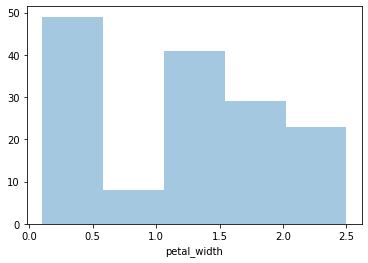

In [44]:
sns.distplot(iris.petal_width, kde = 0)

In [40]:
rp.summary_cont(iris.petal_width)

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,petal_width,150.0,1.1993,0.7622,0.0622,1.0764,1.3223


In [ ]:
# 95% Conf ~ Interval : 95% 신뢰구간

In [26]:
setosa_petal_width = iris.loc[iris.species == 'setosa', 'petal_width']
versicolor_petal_width = iris.loc[iris.species == 'versicolor', 'petal_width']
virginica_petal_width = iris.loc[iris.species == 'virginica', 'petal_width']

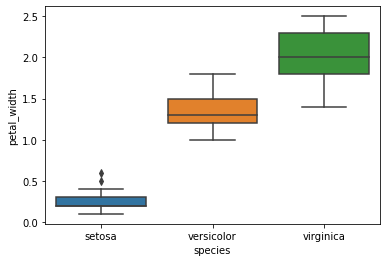

In [27]:
sns.boxplot(data=iris, x='species', y='petal_width')

In [28]:
# 1) 각 데이터 정규성 검정
stats.shapiro(setosa_petal_width) # 정규성 가정 깨짐

(0.7997642159461975, 8.65842082475865e-07)

In [29]:
stats.shapiro(versicolor_petal_width) # 정규성 가정 깨짐

(0.947626531124115, 0.027278218418359756)

In [30]:
stats.shapiro(virginica_petal_width) # 정규성 가정 만족

(0.9597718715667725, 0.08695744723081589)

In [32]:
# 세 데이터 중 두 개가 정규성을 만족하지 않으므로 kruskal-wallis rank sum test 시행

In [33]:
stats.kruskal(setosa_petal_width, versicolor_petal_width, virginica_petal_width)

KruskalResult(statistic=131.18537974024488, pvalue=3.261795552421968e-29)

In [ ]:
# 분산분석 결과 유의확률 0.000으로 유의수준 0.05에서 꽃잎 너비에는 품종에 따라 통계적으로 유의미한 차이가 있는 것으로 나타남.

In [38]:
# 다중비교 시행
sp.posthoc_conover(iris,
                   val_col = 'petal_width',
                   group_col = 'species',
                   p_adjust = 'holm')

,setosa,versicolor,virginica
setosa,1.000000e+00,4.575262e-36,3.412489e-69
versicolor,4.575262e-36,1.000000e+00,6.675097e-34
virginica,3.412489e-69,6.675097e-34,1.000000e+00


In [ ]:
# setosa vs. versicolor -> pvalue = 0.000
# versicolor vs. virginica -> pvalue = 0.000
# setosa vs. virginica -> pvalue = 0.000

# 결론 : 세 데이터 모두 통계적으로 유의한 차이가 있다.

In [ ]:
# 문제 3 : 
# 귀무가설 :품종에 따라 꽃받침 너비에 차이가 없다
# 대립가설 : 품종에 따라 꽃받침 너비는 달라진다

# 꽃받침의 너비 : sepal_width

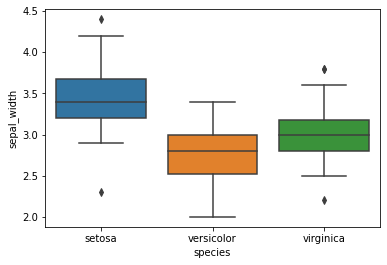

In [47]:
# 데이터 탐색
sns.boxplot(x='species', y='sepal_width', data = iris)

In [49]:
# 정규성 검정
setosa_sepal_width = iris.loc[iris.species == 'setosa', 'sepal_width']
versicolor_sepal_width = iris.loc[iris.species == 'versicolor', 'sepal_width']
virginica_sepal_width = iris.loc[iris.species == 'virginica', 'sepal_width']

In [50]:
stats.shapiro(setosa_sepal_width) # 정규성 만족

(0.97171950340271, 0.2715264856815338)

In [51]:
stats.shapiro(versicolor_sepal_width) #정규성 만족

(0.9741330742835999, 0.33798879384994507)

In [52]:
stats.shapiro(virginica_sepal_width) #정규성 만족

(0.9673910140991211, 0.1809043288230896)

In [ ]:
# 세 데이터 모두 정규성을 만족하므로 등분산 검정 실시

In [53]:
stats.levene(setosa_sepal_width, versicolor_sepal_width, virginica_sepal_width)

LeveneResult(statistic=0.5902115655853319, pvalue=0.5555178984739075)

In [55]:
#유의확률 0.56으로 유의수준 0.05에서 등분산 만족

In [56]:
#등분산을 가정한 분산분석 실시

In [57]:
stats.f_oneway(setosa_sepal_width, versicolor_sepal_width, virginica_sepal_width)

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

In [58]:
# 유의확률 0.000으로 유의수준 0.05에서 꽃의 품종에 따라 꽃받침의 길이에는 통계적으로 유의미한 차이

In [65]:
# 다중비교 시행
sepal_w_mc = MultiComparison(data = iris.sepal_width, groups = iris.species)
print(sepal_w_mc.tukeyhsd())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658  0.001 -0.8189 -0.4971   True
    setosa  virginica   -0.454  0.001 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


In [ ]:
# 세 케이스 모두 귀무가설이 기각되었으므로 통계적으로 유의한 차이가 있는 것으로 나타남.